# Explore here

In [5]:
# Your code here
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv', sep=';')
print(df.shape)
df.head().T

(41188, 21)


,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


In [7]:
print(df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [9]:
print(df.dtypes)

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


In [10]:
df['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

Percentage of subsription :  0.0
Percentage of no subscription :  0.0


<Axes: xlabel='y'>

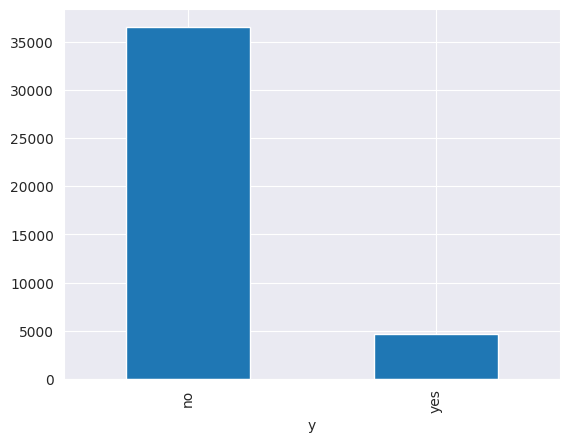

In [11]:
No_sub = len(df[df['y'] == 0])
Sub = len(df[df['y'] == 1])
percent_No_sub = (No_sub/len(df['y'])) * 100
percent_sub = (Sub/len(df['y'])) * 100

print('Percentage of subsription : ',percent_sub)
print('Percentage of no subscription : ', percent_No_sub)


df['y'].value_counts().plot.bar()

<Axes: xlabel='age'>

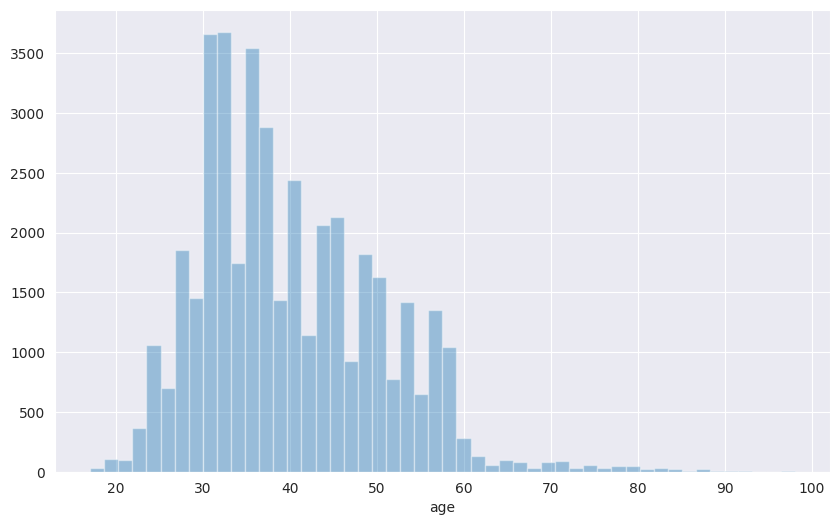

In [12]:
plt.figure(figsize = (10,6))
sns.distplot(a = df['age'], kde = False)

In [13]:
contact = ({'cellular':0, 'telephone':1})
df['contact'] = df['contact'].map(contact)
df = pd.get_dummies(df,columns = ['job','marital','education','default',
                                   'housing','loan','month',
                                   'day_of_week','poutcome'], drop_first = True)
df.shape

(41188, 54)

In [14]:
print(df.dtypes)

age                                int64
contact                            int64
duration                           int64
campaign                           int64
pdays                              int64
previous                           int64
emp.var.rate                     float64
cons.price.idx                   float64
cons.conf.idx                    float64
euribor3m                        float64
nr.employed                      float64
y                                 object
job_blue-collar                     bool
job_entrepreneur                    bool
job_housemaid                       bool
job_management                      bool
job_retired                         bool
job_self-employed                   bool
job_services                        bool
job_student                         bool
job_technician                      bool
job_unemployed                      bool
job_unknown                         bool
marital_married                     bool
marital_single  

In [15]:
X = df.loc[:,df.columns != 'y']
y = df.loc[:,df.columns == 'y']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3 , random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
Logisticcc = LogisticRegression()
Logisticcc.fit(X_train,y_train)
Logisticcc.score(X_train,y_train)

Logisticcc.score(X_test,y_test)
y_prediccion = Logisticcc.predict(X_test)

In [17]:
y_prediccion = Logisticcc.predict(X_test)

In [18]:
model = confusion_matrix(y_test,y_prediccion)
model

print(classification_report(y_test,y_prediccion))

              precision    recall  f1-score   support

          no       0.93      0.97      0.95     10969
         yes       0.67      0.44      0.53      1388

    accuracy                           0.91     12357
   macro avg       0.80      0.70      0.74     12357
weighted avg       0.90      0.91      0.90     12357

